In [1]:
# File: analysis.ipynb
# Date: 1 August 2025
# Author: T. Quinn Smith
# Principal Investigator: Zachary A. Szpiech
# Purpose: Analyses conducted in EGGS paper.

# Organization:
# Assume Chromosome 4 of SWE Samples from 1001 Genomes is in chr4_SWE_1001.vcf.gz
# Generate "small" simulation with num loci < chr4_SWE_1001.vcf.gz
# Generate "large" simulation with num loci > chr4_SWE_1001.vcf.gz
# Run EGGS on small and large using beta distribution and EGGS's approach.
# Summarize missingness.
# Generate the missingness plots.
# Compute KL-divergence between the simulated and SWE samples. Evaluate significance with permutation test.
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%%bash
SEG_SIZE=10000000
mu=0.00000008
rho=0.000000004
Ne=250000
t=$(bc <<< "4 * $Ne * $mu * $SEG_SIZE")
r=$(bc <<< "4 * $Ne * $rho * $SEG_SIZE")
mspms 400 1 -t "$t" -r "$r" "$(($SEG_SIZE-1))" --precision 8 | gzip > large.ms.gz
SEG_SIZE=1000000
t=$(bc <<< "4 * $Ne * $mu * $SEG_SIZE")
r=$(bc <<< "4 * $Ne * $rho * $SEG_SIZE")
mspms 400 1 -t "$t" -r "$r" "$(($SEG_SIZE-1))" --precision 8 | gzip > small.ms.gz

In [ ]:
%%bash
eggs -l 10000000 -b chr4_SWE_1001.vcf.gz < small.ms.gz > beta_small.vcf.gz
eggs -l 10000000 -m chr4_SWE_1001.vcf.gz < small.ms.gz > eggs_small.vcf.gz
eggs -l 10000000 -b chr4_SWE_1001.vcf.gz < large.ms.gz > beta_large.vcf.gz
eggs -l 10000000 -m chr4_SWE_1001.vcf.gz < large.ms.gz > eggs_large.vcf.gz

In [ ]:
%%bash
eggs -v -o chr4_SWE_1001 < chr4_SWE_1001.vcf.gz
eggs -v -o beta_small < beta_small.vcf.gz 
eggs -v -o eggs_small < eggs_small.vcf.gz
eggs -v -o beta_large < beta_large.vcf.gz 
eggs -v -o eggs_large < eggs_large.vcf.gz

In [4]:
# Open a loci.tsv file generated by EGGS.
def open_distribution(fileName):
    dis = []
    for line in open(fileName, 'r'):
        fields = line.split()
        if fields[0] != "CHROM":
            dis.append(float(fields[2]))
    return dis

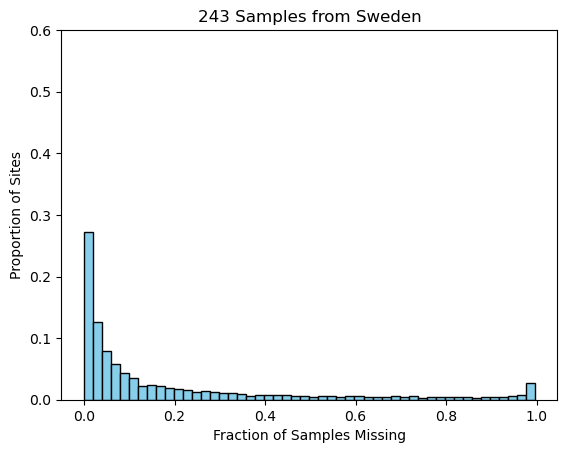

In [42]:
swe1001 = open_distribution('chr4_SWE_1001.loci.tsv')
counts, bin_edges = np.histogram(swe1001, bins=50)
proportions = counts / counts.sum()
bin_widths = np.diff(bin_edges)
bin_centers = bin_edges[:-1] + bin_widths / 2
plt.bar(bin_centers, proportions, width=bin_widths, color='skyblue', edgecolor='black')
plt.ylim([0, 0.6])
plt.title("243 Samples from Sweden")
plt.xlabel("Fraction of Samples Missing")
plt.ylabel("Proportion of Sites")
plt.show()

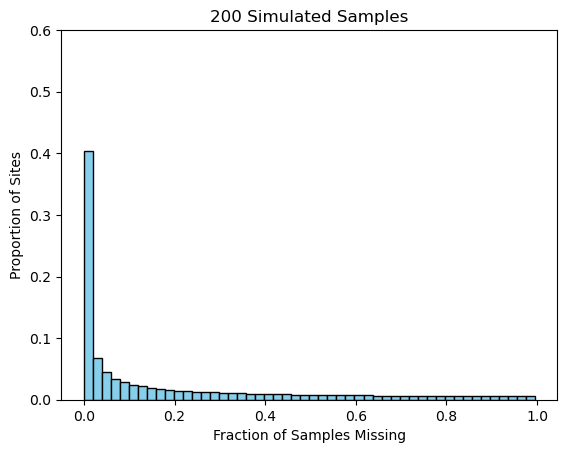

In [44]:
beta_small = open_distribution('beta_small.loci.tsv')
countsBetaSmall, bin_edges = np.histogram(beta_small, bins=50)
proportionsBetaSmall = countsBetaSmall / countsBetaSmall.sum()
bin_widths = np.diff(bin_edges)
bin_centers = bin_edges[:-1] + bin_widths / 2
plt.bar(bin_centers, proportionsBetaSmall, width=bin_widths, color='skyblue', edgecolor='black')
plt.ylim([0, 0.6])
plt.title("200 Simulated Samples")
plt.xlabel("Fraction of Samples Missing")
plt.ylabel("Proportion of Sites")
plt.show()

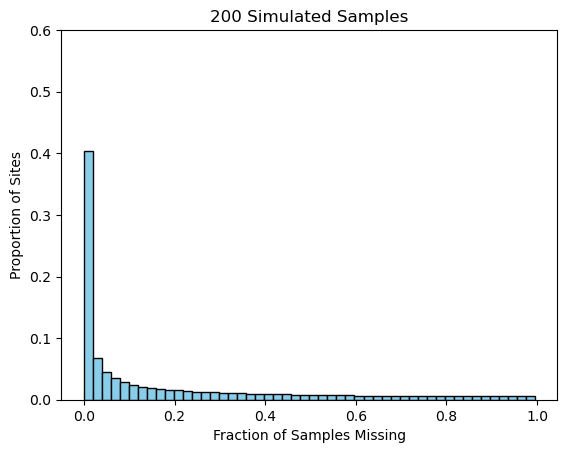

In [45]:
beta_large = open_distribution('beta_large.loci.tsv')
countsBetaLarge, bin_edges = np.histogram(beta_large, bins=50)
proportionsBetaLarge = countsBetaLarge / countsBetaLarge.sum()
bin_widths = np.diff(bin_edges)
bin_centers = bin_edges[:-1] + bin_widths / 2
plt.bar(bin_centers, proportionsBetaLarge, width=bin_widths, color='skyblue', edgecolor='black')
plt.ylim([0, 0.6])
plt.title("200 Simulated Samples")
plt.xlabel("Fraction of Samples Missing")
plt.ylabel("Proportion of Sites")
plt.show()

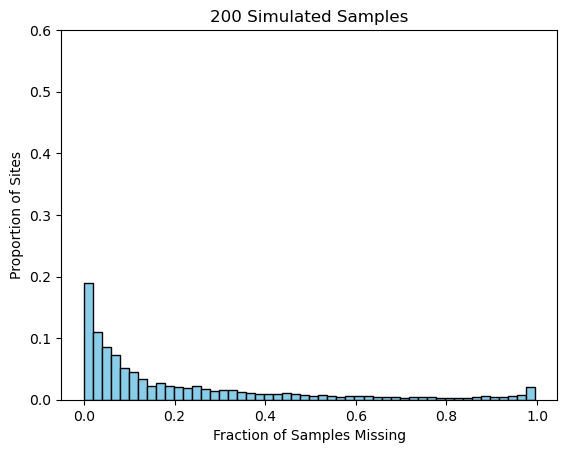

In [46]:
eggs_small = open_distribution('eggs_small.loci.tsv')
countsEGGSSmall, bin_edges = np.histogram(eggs_small, bins=50)
proportionsEGGSSmall = countsEGGSSmall / countsEGGSSmall.sum()
bin_widths = np.diff(bin_edges)
bin_centers = bin_edges[:-1] + bin_widths / 2
plt.bar(bin_centers, proportionsEGGSSmall, width=bin_widths, color='skyblue', edgecolor='black')
plt.ylim([0, 0.6])
plt.title("200 Simulated Samples")
plt.xlabel("Fraction of Samples Missing")
plt.ylabel("Proportion of Sites")
plt.show()

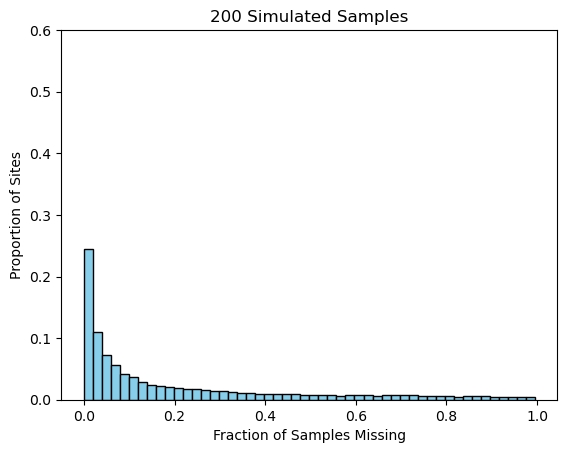

In [47]:
eggs_large = open_distribution('eggs_large.loci.tsv')
countsEGGSLarge, bin_edges = np.histogram(eggs_large, bins=50)
proportionsEGGSLarge = countsEGGSLarge / countsEGGSLarge.sum()
bin_widths = np.diff(bin_edges)
bin_centers = bin_edges[:-1] + bin_widths / 2
plt.bar(bin_centers, proportionsEGGSLarge, width=bin_widths, color='skyblue', edgecolor='black')
plt.ylim([0, 0.6])
plt.title("200 Simulated Samples")
plt.xlabel("Fraction of Samples Missing")
plt.ylabel("Proportion of Sites")
plt.show()

In [48]:
# Our metric between two distributions.
def KL(P, Q):
    epsilon = 1e-12
    P = np.clip(P, epsilon, 1)
    Q = np.clip(Q, epsilon, 1)
    return np.sum(P * np.log(P / Q))
print('SWE vs. BetaSmall:', KL(proportions, proportionsBetaSmall))
print('SWE vs. BetaLarge:', KL(proportions, proportionsBetaLarge))
print('SWE vs. EGGS Small:', KL(proportions, proportionsEGGSSmall))
print('SWE vs. EGGS Large:', KL(proportions, proportionsEGGSLarge))

SWE vs. BetaSmall: 0.09588489314992996
SWE vs. BetaLarge: 0.09588555354974926
SWE vs. EGGS Small: 0.03532979508759753
SWE vs. EGGS Large: 0.04244131705651578


In [49]:
def permutation_test(p, q, numIter):
    klNull = []
    combine = np.concatenate([p, q])
    for _ in range(numIter):
        np.random.shuffle(combine)
        splitIndex = len(p)
        left = combine[:splitIndex]
        right = combine[splitIndex:]
        kl = KL(left, right)
        klNull.append(kl)
    return klNull
klNullBetaSmall = permutation_test(proportions, proportionsBetaSmall, 100000)
klNullBetaLarge = permutation_test(proportions, proportionsBetaLarge, 100000)
klNullEGGSSmall = permutation_test(proportions, proportionsEGGSSmall, 100000)
klNullEGGSLarge = permutation_test(proportions, proportionsEGGSLarge, 100000)

In [50]:
pBetaSmall = np.mean(np.array(klNullBetaSmall) <= KL(proportions, proportionsBetaSmall))
pBetaLarge = np.mean(np.array(klNullBetaLarge) <= KL(proportions, proportionsBetaLarge))
pEGGSSmall = np.mean(np.array(klNullEGGSSmall) <= KL(proportions, proportionsEGGSSmall))
pEGGSLarge = np.mean(np.array(klNullEGGSLarge) <= KL(proportions, proportionsEGGSLarge))
print('pBetaSmall:', pBetaSmall)
print('pBetaLarge:', pBetaLarge)
print('pEGGSSmall:', pEGGSSmall)
print('pEGGSLarge:', pEGGSLarge)

pBetaSmall: 0.02026
pBetaLarge: 0.01987
pEGGSSmall: 0.00283
pEGGSLarge: 0.0052
